In [4]:
# import statements
import pandas as pd

In [6]:
# load data
df = pd.read_csv('3D_Print_Jobs_cleaned.csv')
df

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,Printed On,Material 2 Qty,Material 2,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,Bambu Labs,0.0,Bambu Labs ASA,0.05,Bambu Labs,21.04,User,14,8171785086,"Jan 6, 2025 12:12 PM"
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,"Jan 10, 2025 1:36 PM"
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,4.85,User,3,8214392486,"Jan 10, 2025 1:38 PM"
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,13.73,User,9,8238119583,"Jan 14, 2025 10:53 AM"
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.83,User,1,8269757333,"Jan 17, 2025 2:40 PM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,highfreq_con,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,jzeng56@wisc.edu,X1C - White ASA/Teal ASA,61.98,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,3.10,User,2,8825108477,"Mar 31, 2025 4:29 PM"
1926,test_toolz,Shen,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,jzeng56@wisc.edu,X1C - White ABS/Blue ABS,29.47,Undergraduate,Bambu Labs PLA-CF,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.47,User,1,8825200318,"Mar 31, 2025 4:40 PM"
1927,Noel suarez - Challenge 4 print,Kai,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,nisuarez@wisc.edu,X1C - Blue PLA-CF/Gray PLA-CF,184.55,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,9.23,User,6,8823035854,"Mar 31, 2025 1:23 PM"
1928,WiSP nosecone,Ox,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,xli2599@wisc.edu,X1C - Black PLA-CF/Red PLA-CF,119.21,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,5.96,User,5,8825252393,"Mar 31, 2025 4:47 PM"


233.05

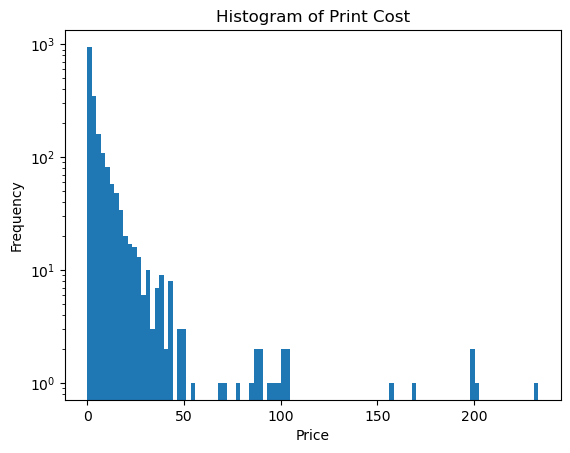

In [104]:
# Create histogram for pricing
ax = df['Print Cost'].plot.hist(bins=100, xlabel='Price', title='Histogram of Print Cost', logy=True)
fig = ax.get_figure()
fig.savefig('HistPrintCost.png')

df['Print Cost'].max()

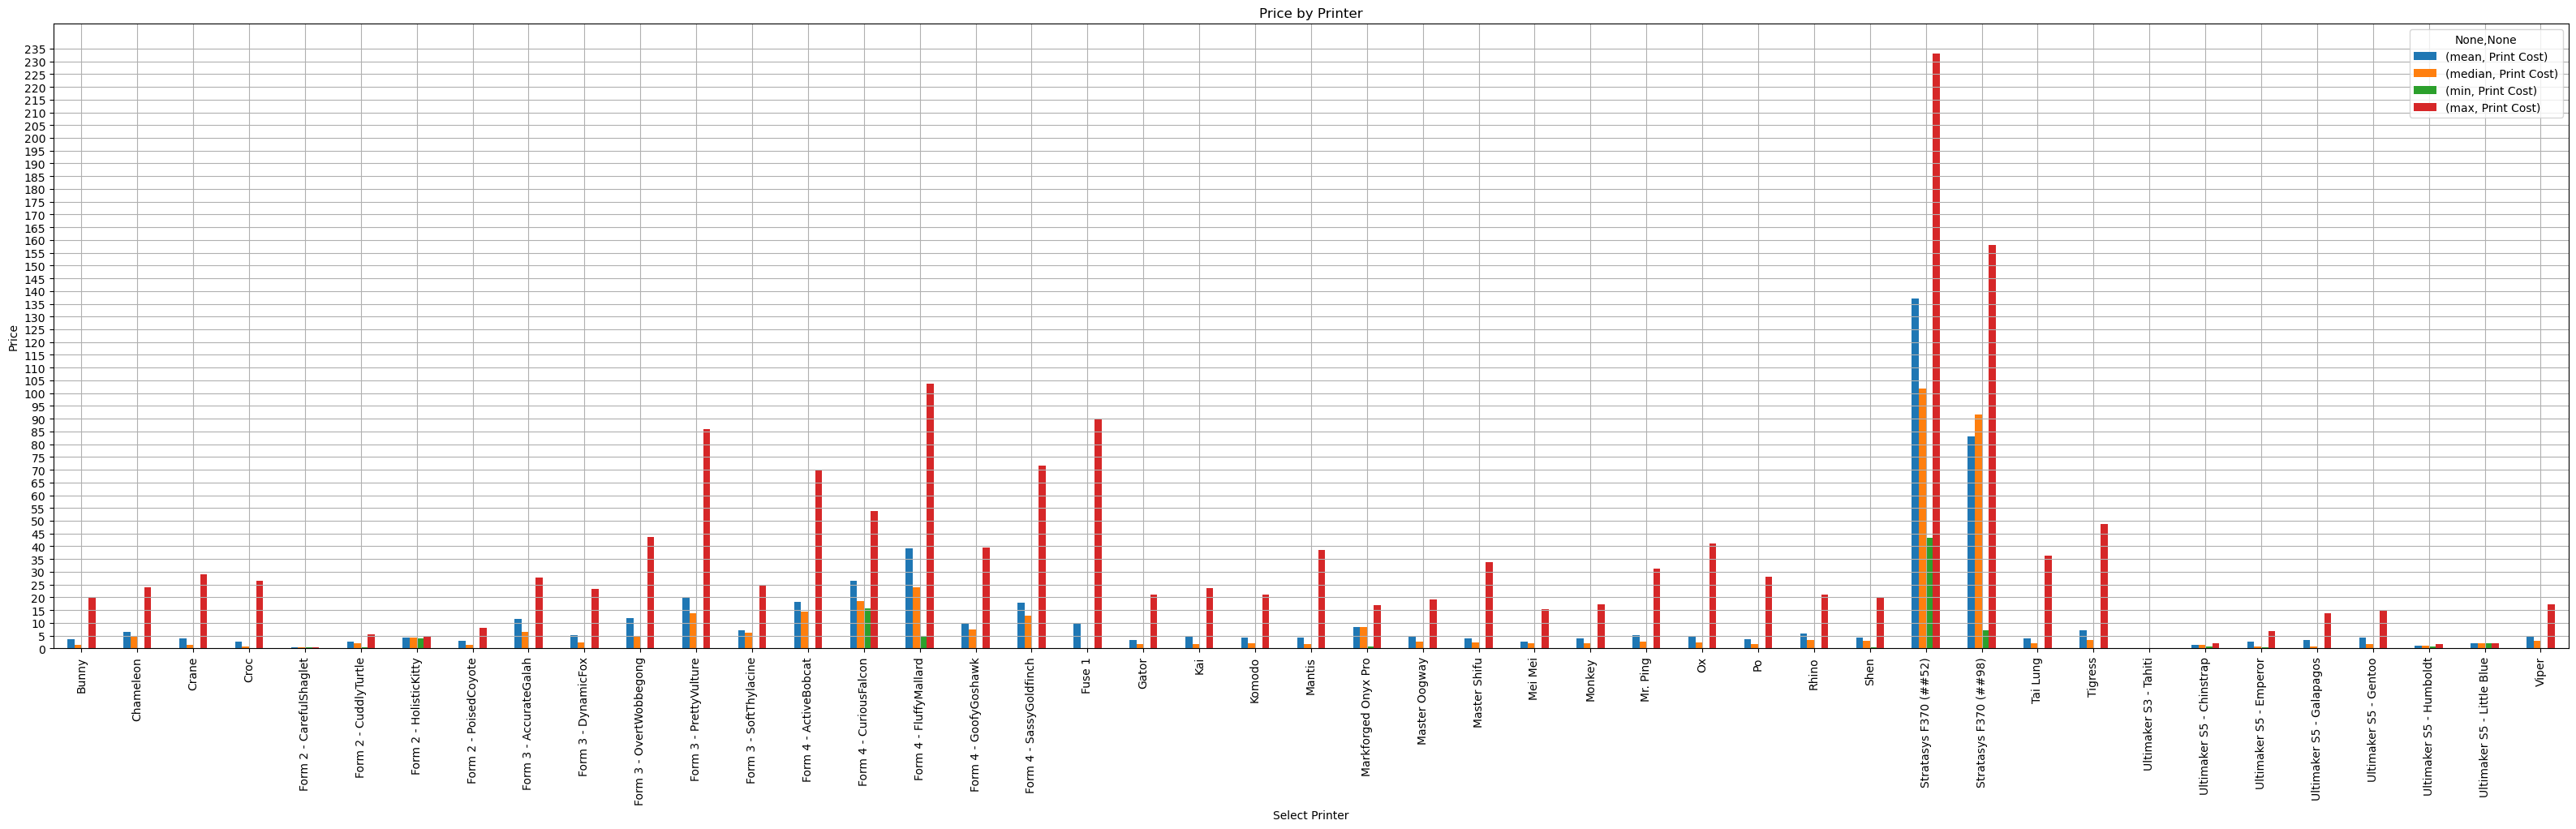

In [106]:
# Create bar chart for the average cost by printer
dfp = df.pivot_table(index='Select Printer', values='Print Cost', aggfunc=['mean', 'median', 'min', 'max'])

ax = dfp.plot.bar(figsize=(40,10), ylabel='Price', yticks=range(0,240,5), title='Price by Printer', grid=True)
fig = ax.get_figure()
fig.savefig('PriceByPrinter.png')

In [134]:
mat_1 = df['Material 1']
mat_1_qty = df['Material 1 Qty']

mat_2 = df['Material 2']
mat_2_qty = df['Material 2 Qty']

mats = list(mat_1.unique()) + list(mat_2.unique())
mats = list(dict.fromkeys(mats))
mat_usage = {}
for mat in mats:
    mat_usage[mat] = 0

length = len(df)
for i in range(length):
    mat_usage[ mat_1[i] ] += mat_1_qty[i]
    mat_usage[ mat_2[i] ] += mat_2_qty[i]

# Day of the Week

In [29]:
import datetime
import pandas as pd

In [18]:
# load data
df = pd.read_csv('3D_Print_Jobs_cleaned.csv')
df.head()

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,Printed On,Material 2 Qty,Material 2,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,Bambu Labs,0.0,Bambu Labs ASA,0.05,Bambu Labs,21.04,User,14,8171785086,"Jan 6, 2025 12:12 PM"
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,"Jan 10, 2025 1:36 PM"
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,4.85,User,3,8214392486,"Jan 10, 2025 1:38 PM"
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,13.73,User,9,8238119583,"Jan 14, 2025 10:53 AM"
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.83,User,1,8269757333,"Jan 17, 2025 2:40 PM"


In [157]:
def get_weekday(time):
    weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    date = ['', '', '']
    i = 0
    for char in time:
        if i == 3:
            break
        elif char == ' ':
            i += 1
            continue
        elif char == ',':
            continue
            
        date[i] += char

    date_num = [int(date[2]), datetime.datetime.strptime(date[0], "%b").month, int(date[1])]

    date_obj = datetime.date(date_num[0], date_num[1], date_num[2])
    wd = date_obj.weekday()

    return weekday[wd]


def convert_time(date):
    time = ''
    i = 0
    for char in date:
        if char == ' ':
            i += 1
            continue
        elif i < 3:
            continue
            
        time += char

    if len(time) == 6:
        time = '0' + time

    num_time = 0000
    
    if time[-2:] == 'AM':
        num_time = int(time[:2]) * 100 + int(time[3:5])
    elif time[:2] == '12':
        num_time = int(time[:2]) * 100 + int(time[3:5])
    else:
        num_time = int(time[:2]) * 100 + int(time[3:5]) + 1200

    return num_time

In [161]:
df['Weekday'] = df['Creation Log'].apply(get_weekday)

In [163]:
df['Time'] = df['Creation Log'].apply(convert_time)

In [167]:
df.head()

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,...,Material 2,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log,Weekday,Time
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,...,Bambu Labs ASA,0.05,Bambu Labs,21.04,User,14,8171785086,"Jan 6, 2025 12:12 PM",Monday,1212
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs PLA Matte,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,"Jan 10, 2025 1:36 PM",Friday,1336
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs PLA Matte,0.05,Bambu Labs,4.85,User,3,8214392486,"Jan 10, 2025 1:38 PM",Friday,1338
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs PLA Matte,0.05,Bambu Labs,13.73,User,9,8238119583,"Jan 14, 2025 10:53 AM",Tuesday,1053
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs PLA Matte,0.05,Bambu Labs,1.83,User,1,8269757333,"Jan 17, 2025 2:40 PM",Friday,1440
